# INM430 - Tiny DS Project Progress Report



# Pablo Quinoa

# An NLP sentiment analysis classifier using Yelp reviews





###### Part-1: Data source and domain description (maximum 150 words):

    This tiny project focuses on the Natural Language Processing domain and more specifically into sentiment analysis. To do so will use a Yelp Dataset of local businesses in 10 different metropolitan areas across 2 countries (dataset from round 13 challenge from https://www.yelp.com/dataset/challenge). Will use a subset (100k reviews) of a reviews.json file that contains around 6.8 million reviews consisting of text, some ids to index businesses and reviews, and a 1-5 score.
    
	The objective of this project is to build a positive/negative sentiment classifier from a set of reviews which consists of text which is labeled with a score that indicates positive-negative feeling, thus would be supervised learning. Will try to find out how having a class imbalanced dataset (>positive reviews) affect when building a binary classifier, what strategies can be used to extract some meaning from text given some labels, and other questions.




## Part-2: Analysis Strategy and Plans (maximum 200 words):

    The objective is to build a sentiment analysis classifier that should be able to understand given some text, if that set of words are talking positively or negatively about a business. Thus, in this dataset the ‘stars’ feature of each review is very informative of the sentiment related to a given text and will be use to label the data as positive or negative. A first important step will be to remove all the data that is understood as neutral (useless for our binary classification), so removing all reviews with 3 stars. Then the next step would be to transform the text of each review into a vector of meaningful words (remove stop words or punctuation).
    
    But now we would need to transform the text into something that a machine learning algorithm can digest. Therefore we will create a new dataframe with the most frequent words, where the number of occurrences of each of the most frequent words inside a review would be our features and the outcome would be either positive (1 or 2 stars) or negative (4 or 5 stars). 
    
    We will use some NLP libraries like nltk to help us with the cleaning of the data (e.g. get a list of defined english stop words so that we can remove them from the text as they do not add meaning).


## Part-3: Initial investigations on the data sources (maximum 150 words): 

    Some initial findings after doing some processing and cleaning of the dataset is that there is quite a big imbalance of positive and negative reviews in the dataset. Around 75% of the reviews are positive and this will totally affect to build an accurate sentiment classifier. When I looked for the most frequent words, words such as ‘great’,’best’,’like’ (positive connotation words) were found and so we would have a dataframe with more positive words than negative. To solve this, will probably downsample the dataset into 50% positive and 50% negative reviews, so we would be building a more accurate sentiment classifier with a fair balance of positive and negative type of words. 


## Part-4: Python code for initial investigations

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

# Load the JSON file into a Pandas dataframe
reviews = pd.read_json ('review_100kSubset.json') 
print (reviews.head()) # check it's loaded



                review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars  useful  funny  cool  \
0      1       6      1     0   
1      5       0      0     0   
2      5       3      0     0   
3      5       0      0     0   
4      1       7      0     0   

                                                text                date  
0  Total bill for this horrible service? Over $8G... 2013-05-07 04:34:36  
1  I *adore* Travis at the Hard Rock's new Kelly ... 2017-01-14 21:30:33  
2  I have to say that this office really has it t... 2016-11-09 20:09:03  
3  Went in for a lunch. Steak sandwich

In [2]:
# Remove useless features/columns for the analisys 
reviews.drop(['user_id', 'business_id','useful','funny','cool'], axis=1, inplace=True)
reviews

,review_id,stars,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
...,...,...,...,...
99995,R3OQnzCBPtD6e3XJbm7vaw,3,I love the clothes in Aritzia. The service I c...,2015-11-08 03:38:13
99996,C0M_WaqYfHZTuE4Y6t-imA,1,We went here to have a small dinner with famil...,2012-03-05 22:16:28
99997,AYSWzH_46u-ZosyA-_z24A,5,Amazing!!! Our 2 boys never had this much fun ...,2018-08-06 02:18:48
99998,zn9SwnAilArrWHKZ8141Tg,5,Wanted a short hair cut but didn't have a regu...,2017-06-18 19:50:46


In [3]:
reviews.describe()

,stars
count,100000.000000
mean,3.736920
std,1.454589
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [4]:
reviews.isnull().values.any() #check if we have any missing values

False

In [5]:
#stars go from 1-5 (min-max). So will remove all reviews with 3 stars. These cannot be classified as positive or negative rewiews (neturality)
reviews = reviews[reviews.stars != 3]
reviews.describe()

,stars
count,89030.000000
mean,3.827721
std,1.517030
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


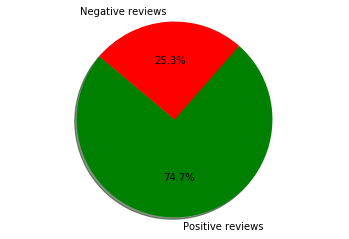

In [6]:
#positive vs negative reviews OVERALL

numPositiveReviews=0
numNegativeReviews=0
for index, row in reviews.iterrows():
    stars=row['stars']
    if stars > 3: 
            numPositiveReviews+=1
    else: 
            numNegativeReviews+=1
            
#plot pie chart      
labels = ['Positive reviews', 'Negative reviews']
sizes = [numPositiveReviews, numNegativeReviews]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [7]:
#Now CLEAN and put all text together across the ENTIRE dataset

stop_words = set(stopwords.words('english'))

allText= []

for index, row in reviews.iterrows():
    review=row['text']
    word_tokens = word_tokenize(review) #split review text into a list of words
    filtered_review = []
    for w in word_tokens:
            if w.isalpha(): # remove all tokens that are not alphabetic
                filtered_review.append(w.lower())
    for w in filtered_review:
        if w not in stop_words: #Remove stop-words (words that do not contain important significance for search queries e.g. 'the','a'...)
            allText.append(w) 

len(allText) #number of total words 

4610148

In [12]:
#Find the 100 most common words across all the cleaned text in the dataset

Counter = Counter(allText) 
  
# most_common() produces k frequently encountered  
most_occur = Counter.most_common(100) 
most_occur

[('food', 43183),
 ('place', 41933),
 ('good', 39246),
 ('great', 39158),
 ('service', 31243),
 ('time', 30017),
 ('like', 28803),
 ('would', 28402),
 ('get', 28284),
 ('one', 27422),
 ('back', 26181),
 ('go', 22637),
 ('really', 21211),
 ('also', 18472),
 ('us', 18044),
 ('got', 17087),
 ('even', 16841),
 ('could', 15887),
 ('best', 15786),
 ('nice', 15032),
 ('well', 14901),
 ('always', 14438),
 ('love', 14293),
 ('staff', 14292),
 ('came', 13485),
 ('first', 13390),
 ('never', 13241),
 ('friendly', 12947),
 ('ordered', 12577),
 ('definitely', 12566),
 ('went', 12558),
 ('order', 12526),
 ('chicken', 12341),
 ('amazing', 12297),
 ('come', 12072),
 ('try', 12001),
 ('restaurant', 11910),
 ('little', 11552),
 ('people', 11412),
 ('experience', 11382),
 ('delicious', 11231),
 ('much', 11226),
 ('made', 11173),
 ('make', 10972),
 ('recommend', 10265),
 ('going', 10265),
 ('said', 10141),
 ('know', 10096),
 ('menu', 10074),
 ('day', 9835),
 ('new', 9810),
 ('way', 9403),
 ('right', 9280),

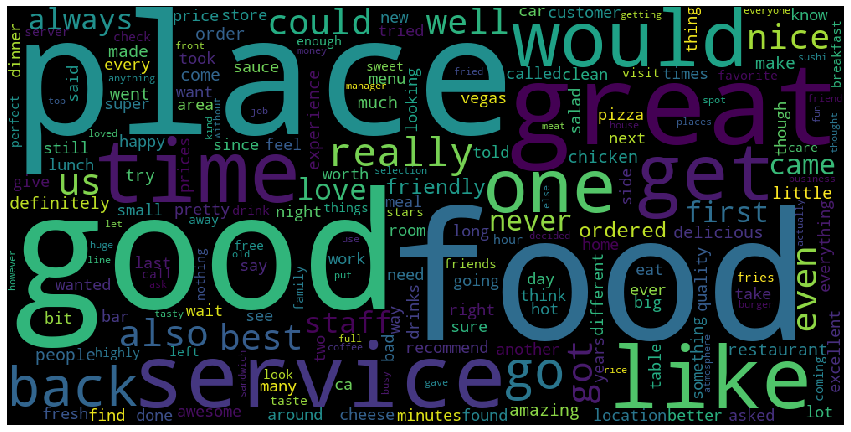

In [15]:
word_could_dict=Counter(allText)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()